<a href="https://colab.research.google.com/github/vaishnavimyana/Machine_Learning/blob/main/Module_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

k#CLASSIFICATION

Drive link for Loans Data:  https://drive.google.com/file/d/1HPfEnkQSOG-KFRw0Stt-ph7LdHiarvn6/view?usp=sharing

In [1]:
#import statements

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
#read loans data csv file

In [4]:
data = pd.read_csv("/content/loans_dataset.csv")

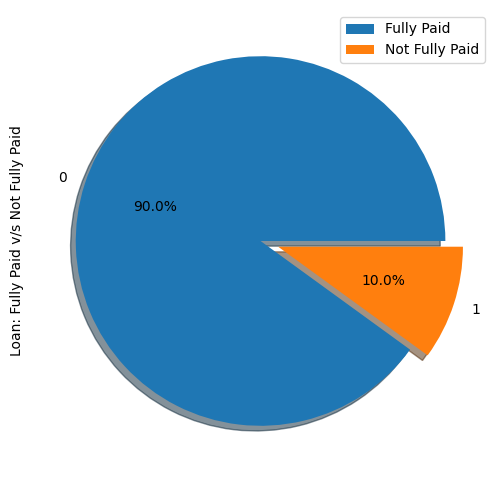

In [5]:
#function to visualise data
def show_data(data):
    count=""
    if isinstance(data, pd.DataFrame):
        count=data['not.fully.paid'].value_counts()
    else:
        count=data.value_counts()
    count.plot(kind='pie',explode=[0,0.1],figsize=(6,6),autopct='%1.1f%%', shadow=True)
    plt.ylabel("Loan: Fully Paid v/s Not Fully Paid")
    plt.legend(["Fully Paid","Not Fully Paid"])
    plt.show()
show_data(data)

In [6]:
print(data.dtypes)

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object


In [7]:
#encode data into continuous values
encoded_data = pd.get_dummies(data,prefix='purpose',drop_first = 'True')
print(encoded_data.dtypes)

credit.policy                   int64
int.rate                      float64
installment                   float64
log.annual.inc                float64
dti                           float64
fico                            int64
days.with.cr.line             float64
revol.bal                       int64
revol.util                    float64
inq.last.6mths                  int64
delinq.2yrs                     int64
pub.rec                         int64
not.fully.paid                  int64
purpose_credit_card             uint8
purpose_debt_consolidation      uint8
purpose_educational             uint8
purpose_home_improvement        uint8
purpose_major_purchase          uint8
purpose_small_business          uint8
dtype: object


In [8]:
#split data into train and test
from sklearn.model_selection import train_test_split
X= encoded_data.drop('not.fully.paid',axis=1)
y=encoded_data['not.fully.paid']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,stratify=y,random_state=2022)

#RANDOM SAMPLING

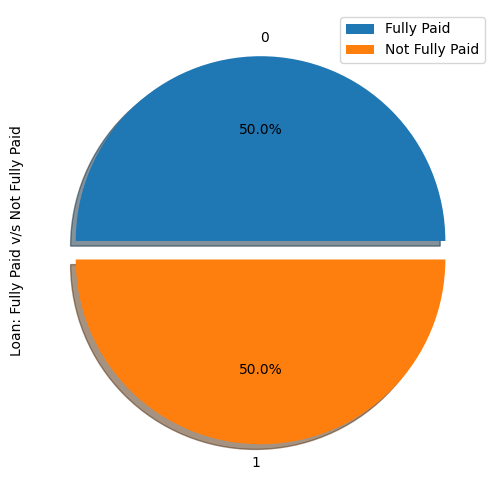

In [9]:
#Code to write random undersampling
X_train_cp = X_train.copy()
X_train_cp['not.fully.paid'] = y_train
y_0 = X_train_cp[X_train_cp['not.fully.paid'] == 0]
y_1 = X_train_cp[X_train_cp['not.fully.paid'] == 1]
y_0_undersample = y_0.sample(y_1.shape[0])
loan_data_undersample = pd.concat([y_0_undersample , y_1], axis = 0)
show_data(loan_data_undersample)


# #SMOTE UnderSampling

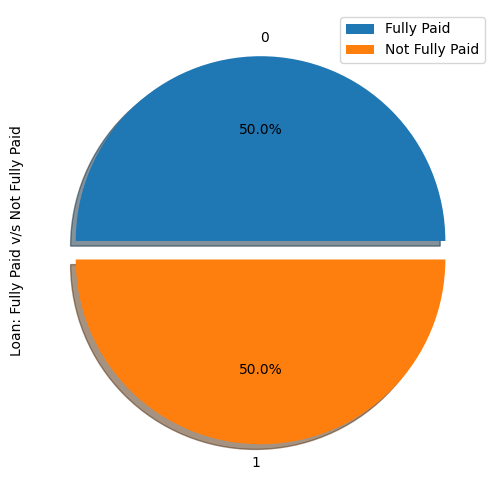

In [10]:
#implement SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_train_SMOTE,y_train_SMOTE = smote.fit_resample(X_train,y_train)
show_data(y_train_SMOTE)

#LOGISTIC REGRESSION

Drive link for csv file: https://drive.google.com/file/d/175rhCDkhPRr3tWGq2BT616ZAPUnYd_l5/view?usp=sharing

In [11]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

In [12]:
#read csv file
df = pd.read_csv("/content/breast_cancer_diagnosis.csv")

In [13]:
#drop null values and print the column names
df.dropna(inplace = True)
print(df.columns)

Index(['id', 'diagnosis', 'Radius_mean', 'Texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [14]:
#checking for null values
df.columns[df.isnull().any()]

Index([], dtype='object')

In [15]:
#check the number of examples belonging to each class
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [16]:
#segregating inputs and outputs
X = df.drop('diagnosis', axis = 1)
from sklearn.model_selection import train_test_split
X= df.drop('diagnosis',axis=1)
y=df['diagnosis']

In [17]:
#split training and testing data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,stratify=y,random_state=1)

In [18]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
Classifier = LogisticRegression(solver = 'liblinear')
Classifier.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [19]:
#predict values
y_test_hat = Classifier.predict(X_test)
results = pd.DataFrame({'Actual' :y_test,'predictions' :y_test_hat})
print(results.head())

    Actual predictions
399      B           B
16       M           M
369      M           M
174      B           B
71       B           B


In [20]:
#check accuracy on training data
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_test_hat))

0.8713450292397661


In [21]:
#check accuracy on testing data
y_train_hat=Classifier.predict(X_train)
print(accuracy_score(y_train,y_train_hat))

0.914572864321608


In [22]:
#getting probability predictions from the model
y_test_hat_prob=Classifier.predict_proba(X_test)
print(y_test_hat_prob.shape)

(171, 2)


In [23]:
#compare the predicted values with the actual values along with the predicted
pls=y_test_hat_prob[:,1]
Results=pd.DataFrame({'Actual':y_test,'Predictions':'y_test_hat','Prob(Class=M)':pls})
Results.head(5)

,Actual,Predictions,Prob(Class=M)
399,B,y_test_hat,0.481219
16,M,y_test_hat,0.712637
369,M,y_test_hat,0.816097
174,B,y_test_hat,0.435836
71,B,y_test_hat,0.440913


#K NEAREST NEIGHBORS CLASSIFICATION

Drive link for csv file:
https://drive.google.com/file/d/175rhCDkhPRr3tWGq2BT616ZAPUnYd_l5/view?usp=drive_link

In [24]:
#import necessary libraries
import pandas as pd
import numpy as np



In [25]:
#read csv file
df=pd.read_csv("/content/breast_cancer_diagnosis (1).csv")

In [26]:
df.columns

Index(['id', 'diagnosis', 'Radius_mean', 'Texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [31]:
#choose first 10 columns for the models data
df = df[['id', 'diagnosis', 'Radius_mean', 'Texture_mean', 'perimeter_mean','area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean','concave points_mean', 'symmetry_mean']]

In [33]:
#divide the data into inputs and outputs
X = df.drop("diagnosis",axis = 1)
y = df["diagnosis"]

In [34]:
#split into train and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=1)

In [36]:
#import KNeighborsClassifier from the library and train the model
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=2)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [40]:
#predict the outputs
y_test_hat = model.predict(X_test)
Results = pd.DataFrame({'actual':y_test,'prediction':y_test_hat})
Results.head()

,actual,prediction
421,B,B
47,M,B
292,B,B
186,M,M
414,M,B


In [41]:
#evaluate the model using confusion matrix
from sklearn.metrics import confusion_matrix,recall_score,precision_score
cm = confusion_matrix(y_test,y_test_hat)
print(cm)

[[106   2]
 [ 39  24]]


In [42]:
#print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_hat))

              precision    recall  f1-score   support

           B       0.73      0.98      0.84       108
           M       0.92      0.38      0.54        63

    accuracy                           0.76       171
   macro avg       0.83      0.68      0.69       171
weighted avg       0.80      0.76      0.73       171



In [44]:
#experiment with k values as 7
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)
y_test_hat = model.predict(X_test)
Results = pd.DataFrame({'actual':y_test,'prediction':y_test_hat})
Results.head(10)

,actual,prediction
421,B,B
47,M,B
292,B,B
186,M,M
414,M,B
132,M,M
161,M,M
197,M,M
245,B,B
453,B,B


In [45]:
#print classification report
print(classification_report(y_test,y_test_hat))

              precision    recall  f1-score   support

           B       0.74      0.94      0.82       108
           M       0.79      0.43      0.56        63

    accuracy                           0.75       171
   macro avg       0.77      0.68      0.69       171
weighted avg       0.76      0.75      0.73       171



#RANDOM FOREST CLASSIFIER

Drive link for csv file:

In [46]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

In [47]:
#read csv file
df=pd.read_csv("/content/banknote_authentication.csv")

In [48]:
df.columns

Index(['variance', 'skew', 'kurtosis', 'entropy', 'authentic'], dtype='object')

In [49]:
#check for null values
df.columns[df.isnull().any()]

Index([], dtype='object')

In [51]:
#count the number of values in each class
df["authentic"].value_counts()

0    762
1    610
Name: authentic, dtype: int64

In [52]:
df.sample(n=5,random_state=55).sort_values(['variance'])

,variance,skew,kurtosis,entropy,authentic
1180,-2.21830,-1.2540,2.9986,0.36378,1
769,-0.89409,3.1991,-1.8219,-2.94520,1
1353,0.11592,3.2219,-3.4302,-2.84570,1
239,2.39520,9.5083,-3.1783,-3.00860,0
722,4.84510,8.1116,-2.9512,-1.47240,0


In [53]:
#split data into inputs and outputs
X = df.drop("authentic",axis = 1)
y = df["authentic"]

In [54]:
#split data into training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=1)

In [55]:
#import RandomForestClassifier model and train it
from sklearn.ensemble import RandomForestClassifier
Classifier = RandomForestClassifier(random_state=0,min_samples_leaf=10)
Classifier.fit(X_train,y_train)

RandomForestClassifier(min_samples_leaf=10, random_state=0)

In [59]:
#predict the values
y_test_hat=Classifier.predict(X_test)
results = pd.DataFrame({'actual':y_test})
columns = pd.DataFrame({'prediction':y_test_hat})
result = results.join(columns.set_index(results.index))
print(result)

      actual  prediction
1240       1           1
703        0           0
821        1           1
1081       1           1
37         0           0
...      ...         ...
559        0           0
400        0           0
439        0           0
634        0           0
628        0           0

[412 rows x 2 columns]


In [60]:
#check accuracy of testing data
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_test_hat))

0.9878640776699029


In [61]:
#check accuracy of training data
y_train_hat=Classifier.predict(X_train)
print(accuracy_score(y_train,y_train_hat))

0.9885416666666667


In [62]:
#print confusion matrix
from sklearn.metrics import confusion_matrix,recall_score,precision_score
cm=confusion_matrix(y_test,y_test_hat)
print(cm)

[[231   4]
 [  1 176]]


In [64]:
#calculate recall, precision, specificity
TN = cm[0][0]
FP = cm[1][0]
FN = cm[1][0]
TP = cm[1][1]
recall = TP/float(FN+TN)
precision = TP/float(TP+FP)
specificity = TN/float(TN+FP)
print("recall, precision, specificity=",recall, precision, specificity)

recall, precision, specificity= 0.7586206896551724 0.9943502824858758 0.9956896551724138


In [65]:
#print importance of each feature
feature_importances=pd.DataFrame(Classifier.feature_importances_,index=X_train.columns,columns=['importance']).sort_values('importance')
feature_importances

,importance
entropy,0.043526
kurtosis,0.133505
skew,0.223925
variance,0.599044


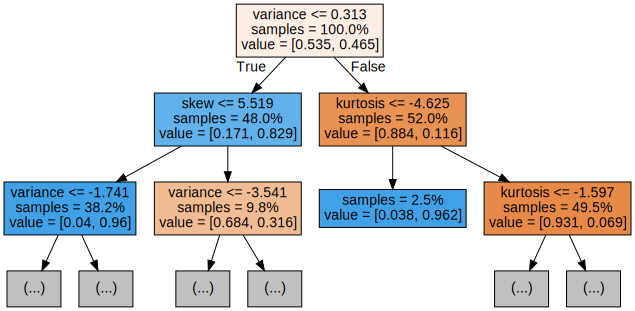

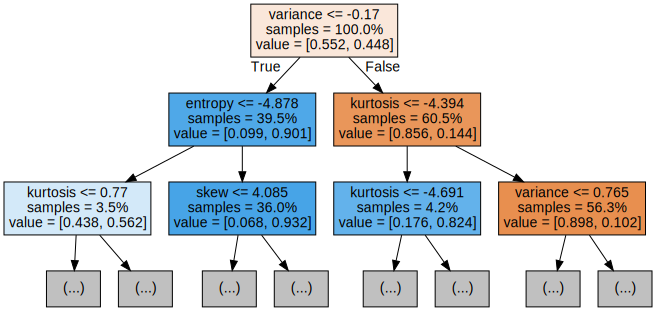

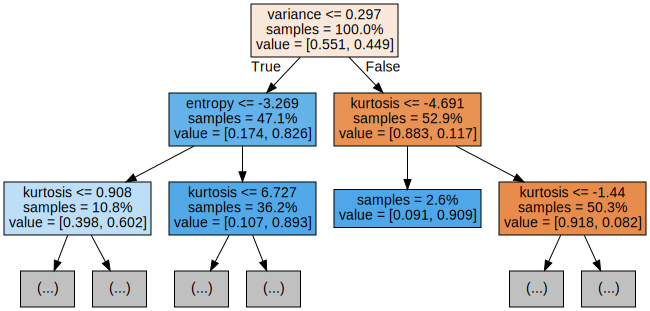

In [63]:
#visualize 3 trees
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
for i in range(3):
    tree=Classifier.estimators_[i]
    dot_data=export_graphviz(tree,feature_names=X_train.columns,filled=True,max_depth=2,impurity=False,proportion=True)
    graph=graphviz.Source(dot_data)
    display(graph)